In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#! ROC Curve Plotting
def eval_scores(human_scores, gpt_scores, color, title):
    # Data
    A = human_scores
    B = gpt_scores
    # Combine scores and true labels
    scores = A + B
    labels = [0] * len(A) + [1] * len(B)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    # Calculate AUC (Area Under Curve)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=title)

    # find the closest fpr more than 1% fpr
    coords1 = (0, 0)
    for idx, fpr_ in enumerate(fpr):
        if fpr_ > 0.01:
            coords1 = (float(fpr[idx]), float(tpr[idx]))
            break
    
    coords2 = (0, 0)
    for idx, fpr_ in enumerate(reversed(fpr)):
        if fpr_ < 0.01:
            coords2 = (float(fpr[len(fpr) - idx - 1]), float(fpr[len(fpr) - idx - 1]))
            break

    # (x1, y1) and (x2, y2)
    # Gradient = (y2 - y1) / (x2 - x1)
    # y = [(y2 - y1) / (x2 - x1)] (0.01 - x2) + y2
    tpr_at_one_fpr = ((coords2[1] - coords1[1]) / (coords2[0] - coords1[0])) * (0.01 - coords2[0]) + coords2[1]
    
    return (roc_auc, tpr_at_one_fpr)

In [2]:
import json
import os
import csv

def analyse_dataset(path_name, name, color_dict):
    # create graph
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve on {name} dataset with GPT-3.5 Regeneration')

    files = list(filter(lambda x: ".json" in x and "IGNORE" not in x, os.listdir(f"./results/{path_name}")))
    results = []
    results.append(["Method Name", "ROC_AUC", "TPR at 1% FPR"])
    for file in files:
        with open(f"./results/{path_name}/{file}") as f:
            data = json.load(f)
            
            method_name = file.replace(".json", "")
            roc_auc, tpr_at_one_fpr = eval_scores(data["human_scores"], data["ai_scores"],  color_dict[method_name] if method_name in color_dict.keys() else "grey", method_name)
            results.append([method_name, roc_auc, tpr_at_one_fpr])
    
    plt.legend(loc="lower right")
    plt.savefig(f"../figures/{path_name}_graph.png", dpi=600)
    plt.show()

    with open(f"./results/{path_name}/compiled.csv", "w+") as f:
        csv_file = csv.writer(f)
        csv_file.writerows(results)

In [3]:
color_dict = {
	"DNAGPT": "orange",
	"Edit Distance": "red",
	"Cosine Similarity": "green",
	"Random Forest": "blue",
	"SVM": "purple"
}

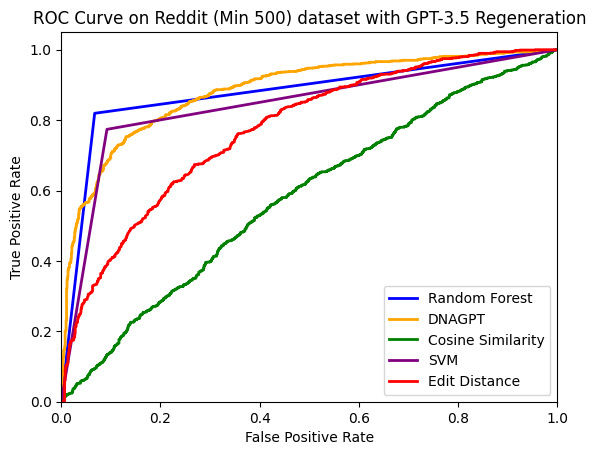

In [4]:
analyse_dataset("Reddit_Minimum_600", "Reddit (Min 500)", color_dict)

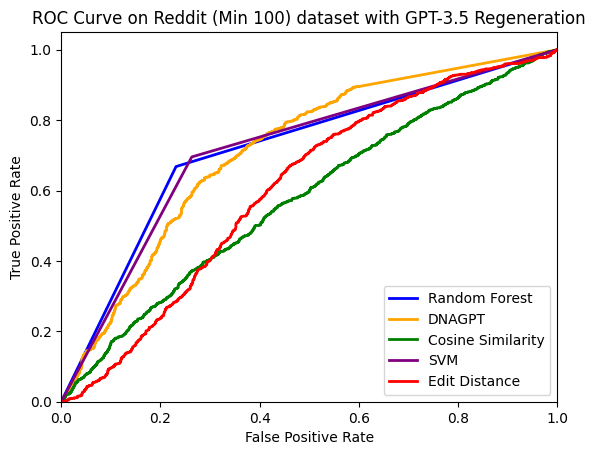

In [5]:
analyse_dataset("Reddit_Minimum_100", "Reddit (Min 100)", color_dict)

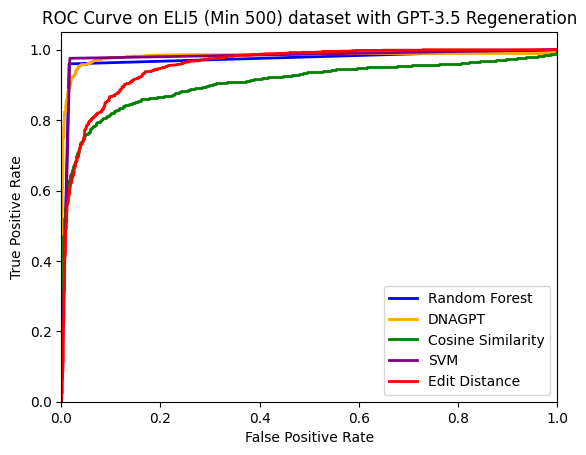

In [6]:
analyse_dataset("ELI5_Minimum_600", "ELI5 (Min 500)", color_dict)

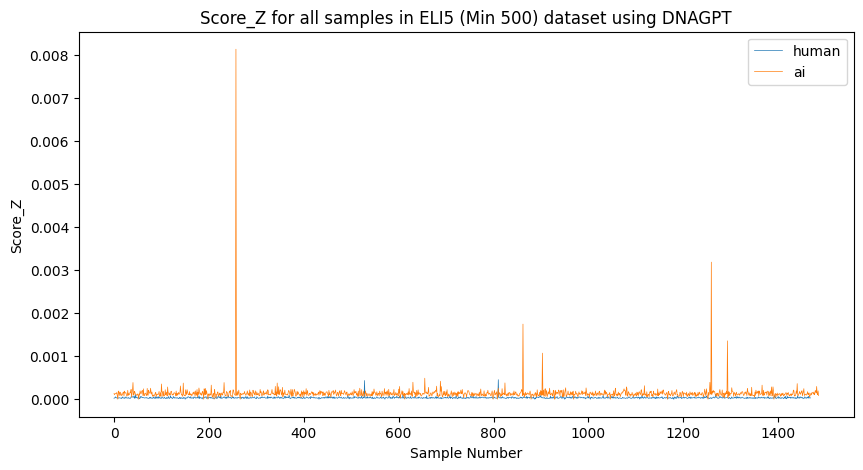

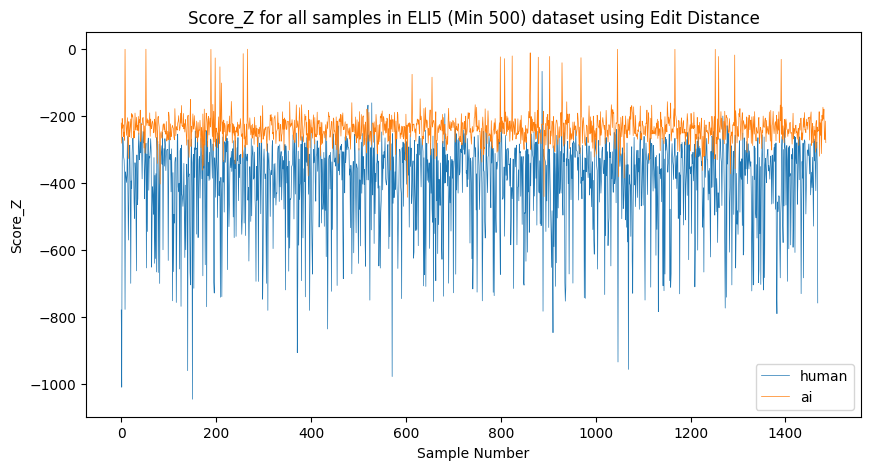

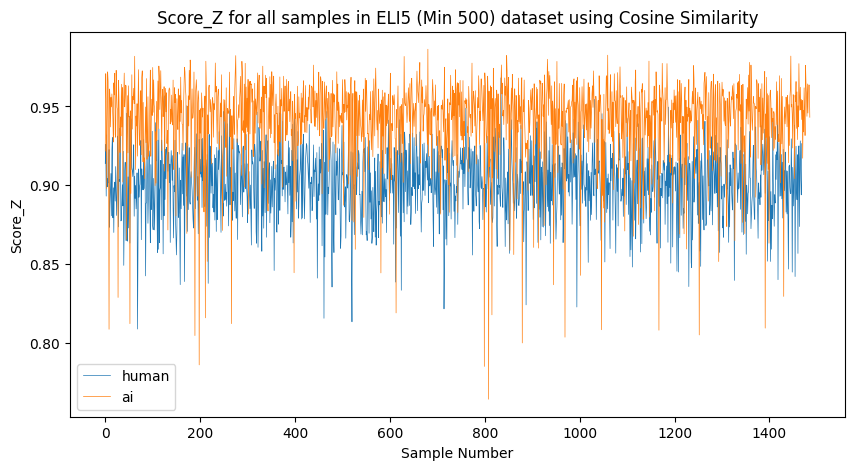

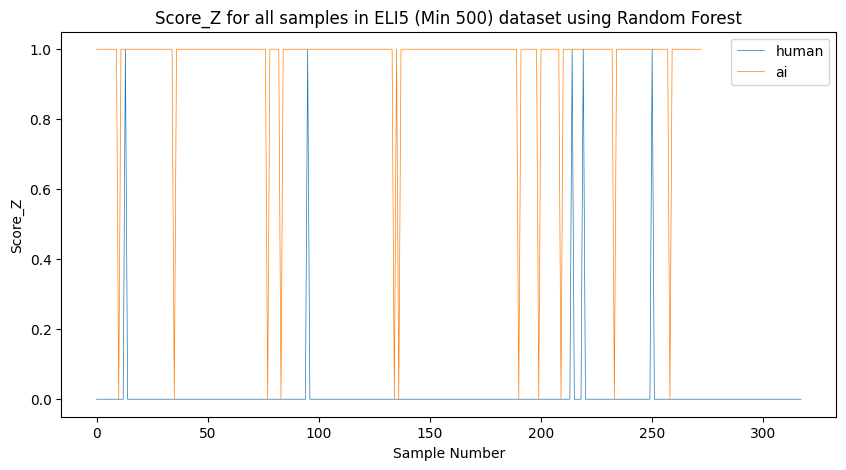

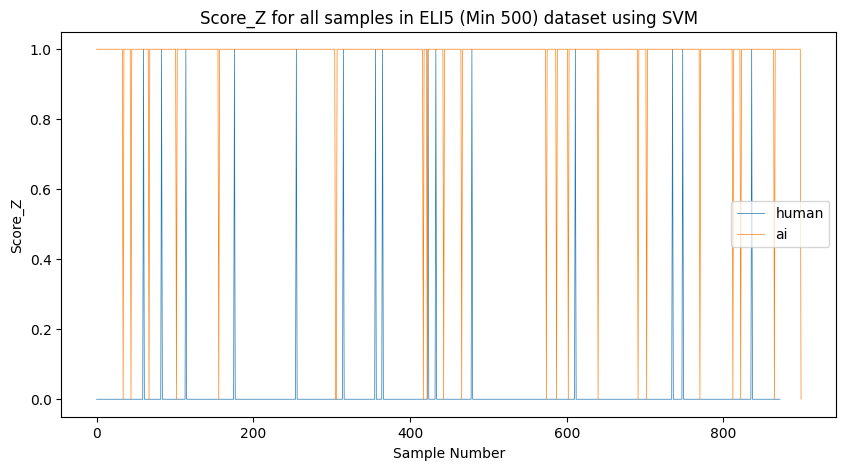

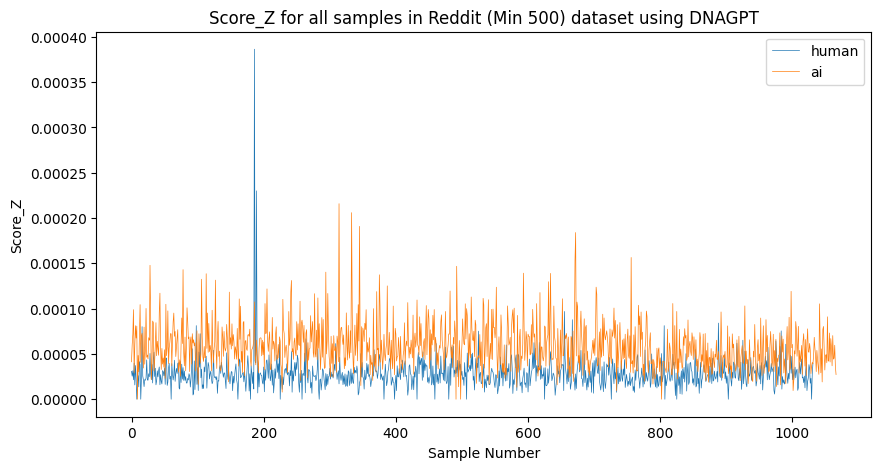

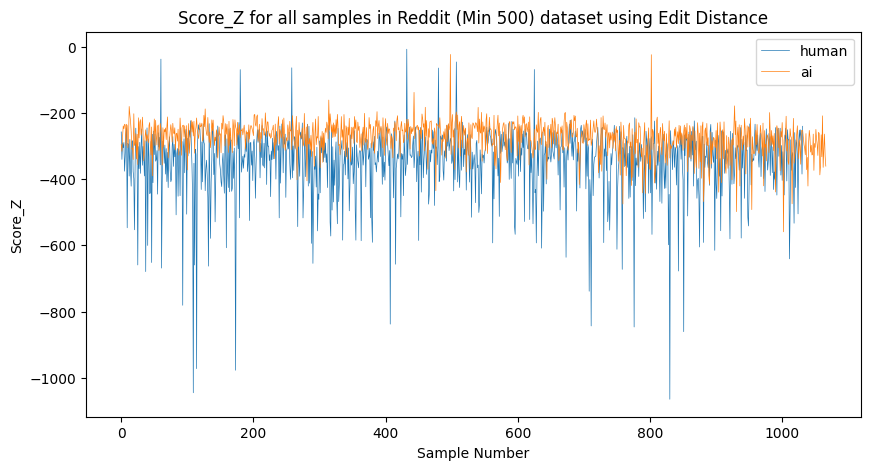

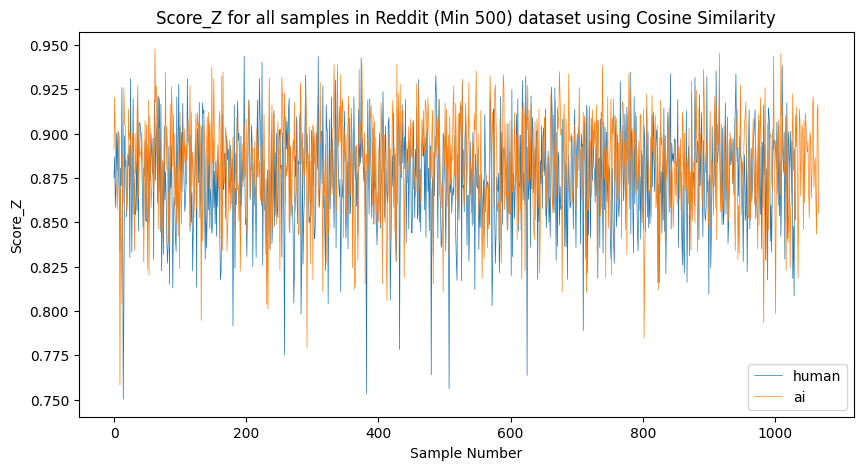

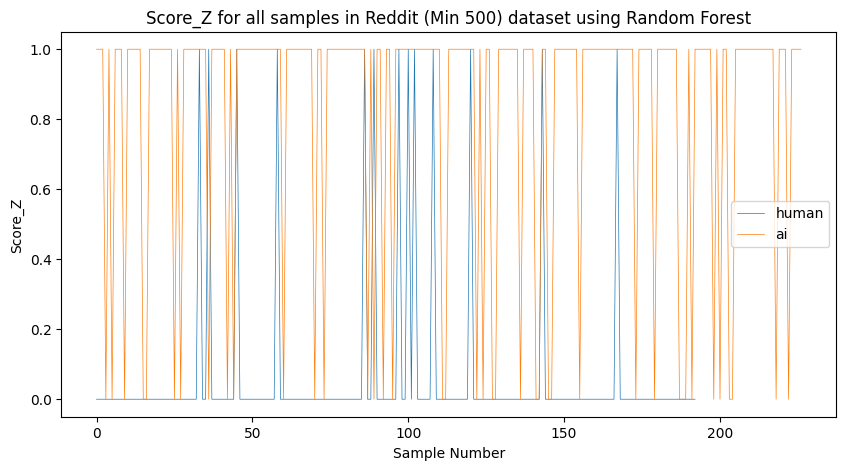

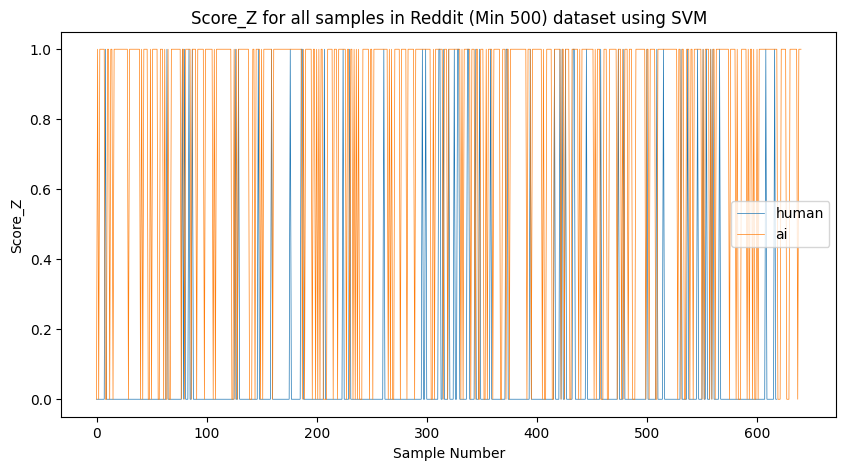

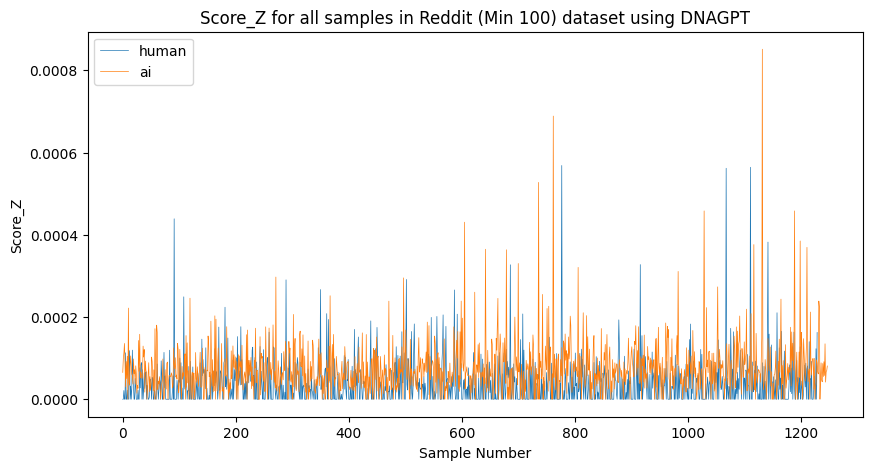

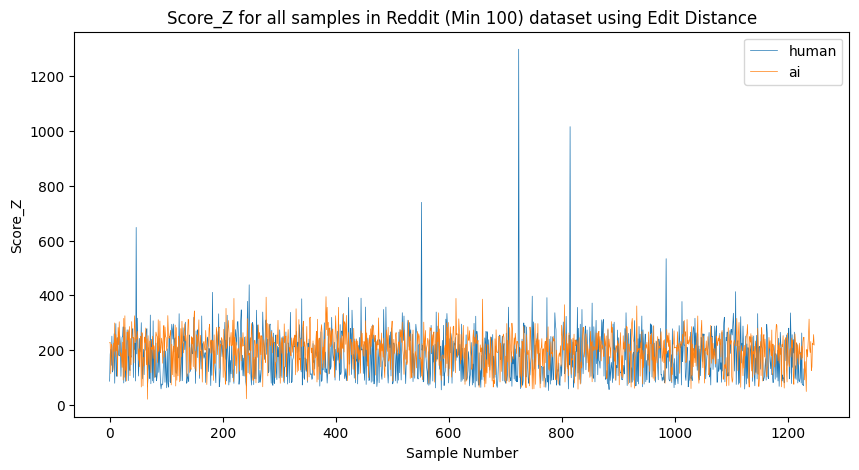

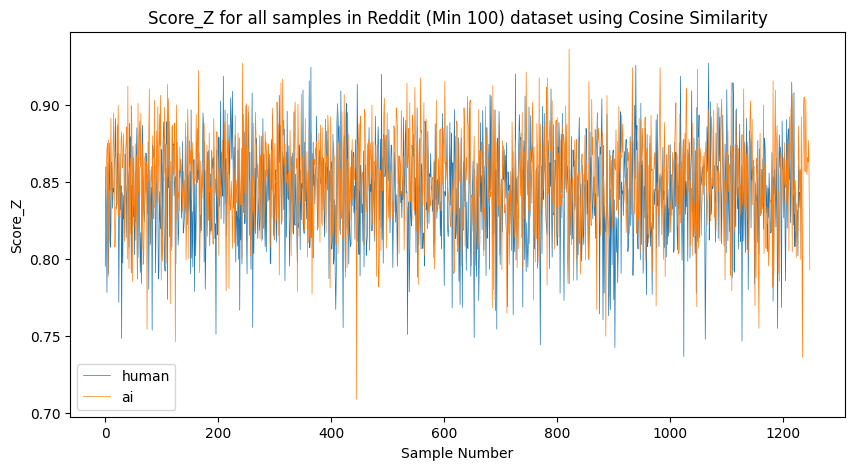

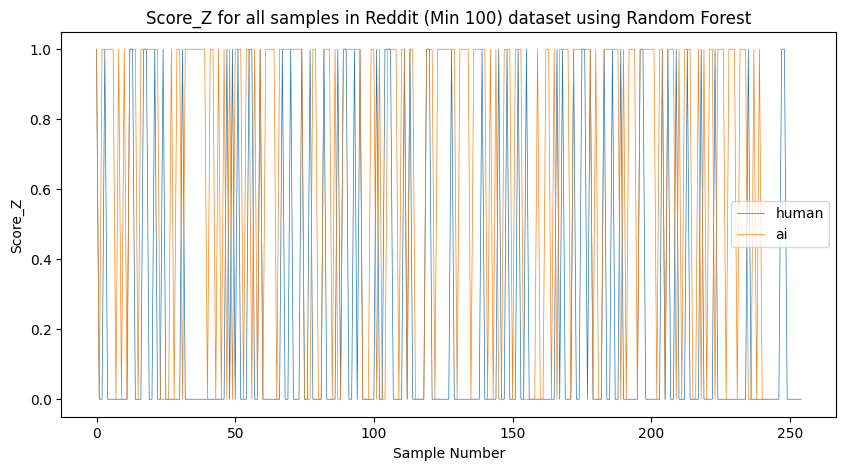

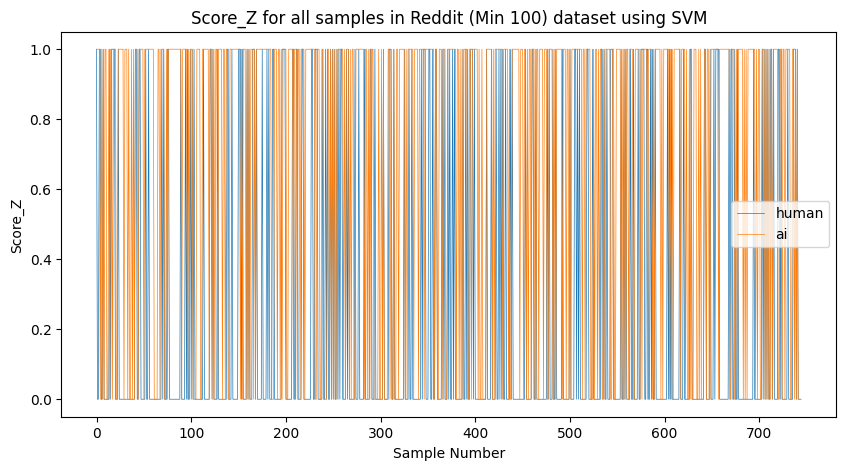

In [10]:
import os

def plot_sample_graph(method, dataset, dataset_name):
	with open(f"./results/{dataset}/{method}.json") as f:
		data = json.load(f)
		human_scores = data["human_scores"]
		ai_scores = data["ai_scores"]
	plt.figure(figsize=(10, 5))
	plt.title(f"Score_Z for all samples in {dataset_name} dataset using {method}")
	plt.ylabel("Score_Z")
	plt.xlabel("Sample Number")

	plt.plot(human_scores, label='human', linewidth=0.5)
	plt.plot(ai_scores, label='ai', linewidth=0.5)
	plt.legend()

	# check if directory exists
	if not os.path.exists(f"../figures/samples/{dataset}"):
		os.makedirs(f"../figures/samples/{dataset}")
	plt.savefig(f"../figures/samples/{dataset}/{method}.png", dpi=600)

for dataset in [("ELI5_Minimum_600", "ELI5 (Min 500)"), ("Reddit_Minimum_600", "Reddit (Min 500)"), ("Reddit_Minimum_100", "Reddit (Min 100)")]:
	for method in ["DNAGPT", "Edit Distance", "Cosine Similarity", "Random Forest", "SVM"]:
		plot_sample_graph(method, dataset[0], dataset[1])

In [19]:
# Grab random sample ELI5
import random
import json

def print_random_sample(dataset, result_dataset, method):
	with open(f"./results/{dataset}/{method}.json") as f:
		data = json.load(f)
	with open(f"./regenerated/results_{result_dataset}.json") as f:
		samples_data = json.load(f)

	# get random sample
	idx = random.randint(0, len(data["human_scores"]) - 1)

	print(f"Sample {idx}")
	print(f"Score: {data['human_scores'][idx]}")
	print(json.dumps(samples_data[idx + len(data['ai_scores'])], indent=4))

print_random_sample("Reddit_Minimum_100", "reddit", "Edit Distance")

Sample 601
Score: 160.0
{
    "type": "human",
    "text": "\nmaintenance isn't too different from any other japanese bike. i bought my vstrom with ~ 22000 miles on it, have put on nearly another 22000, but have not yet needed new chain, sprockets, or rocker pads. some of that is down to proper chain maintenance, some to the fact it isn't a crotch rocket with a super powerful engine and i don't ride like a jackass ( usually : ). tires are just as with any other motorcycle - some last longer than others, and you're very doing well to get 10000 + miles out of a rear tire. the dl1000 engine is very reliable. i had my valve clearance checked at about 37000 miles, and it was spot - on. hadn't changed a bit since the last valve clearance check ( around 15000 miles ). the major pain in the ass has been electrical issues. by that i mean, charging system problems. my 2007 dl1000 was ( probably ) on its original stator but i bought the bike at about 22000 miles. by ~ 25000 miles, the stator was 